# APPLICATION OF PCA: IMAGE COMPRESSION

# EXERCISE:
Pick your own image. Find how many components you need to capture 30%, 50%, 75%, 90% of the total variance in the original picture.

In each case, print the reverse transform of the image with a proper title.

Maybe use subplots so that all cases appear on the same figure.

In [1]:
import matplotlib.image as mplib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [70]:
# Example of conversion:
from PIL import Image
im1 = Image.open('/Users/omaral-shammary/Downloads/1635524201635 (1).jpeg')
im1.save('/Users/omaral-shammary/Downloads/1635524201635 (1).png')

In [73]:
# Read and print some image
img = mplib.imread('/Users/omaral-shammary/Downloads/1635524201635 (1).png')
img.shape

(800, 800, 3)

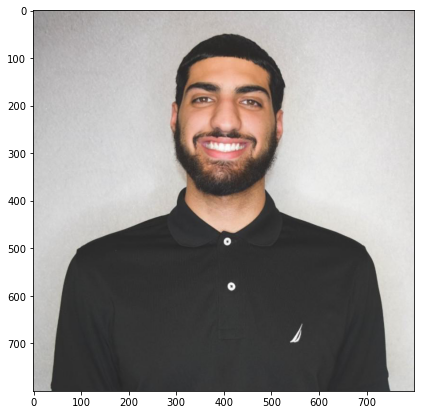

In [74]:
plt.figure(figsize = (10,7))
plt.imshow(img);

In [76]:
# Color images are thus 3D array, which we reshape as 2D
# The 1800 observations, each a 600x3 matrix, become each a 1800 vector
# Check numpy doc to find out about reshape
img_r = np.reshape(img,(800,2400))
print(img_r.shape)

(800, 2400)


In [77]:
# Set pca for 30, 50, 75, and 90 components and implement on the image
pca30 = PCA(n_components = 30).fit(img_r)
pca50 = PCA(n_components = 50).fit(img_r)
pca75 = PCA(n_components = 75).fit(img_r)
pca90 = PCA(n_components = 90).fit(img_r)

# Produce the reduced dimensionality data
img_trans30 = pca30.transform(img_r)
img_trans50 = pca50.transform(img_r)
img_trans75 = pca75.transform(img_r)
img_trans90 = pca90.transform(img_r)

# How much variance is explained by the 10 components?
print(np.sum(pca30.explained_variance_ratio_))
print(np.sum(pca50.explained_variance_ratio_))
print(np.sum(pca75.explained_variance_ratio_))
print(np.sum(pca90.explained_variance_ratio_))

0.9890065
0.99465275
0.9973993
0.99816483


In [78]:
# fraction of the variance explained by first components
print(pca30.explained_variance_ratio_[0]) 
print(pca50.explained_variance_ratio_[0])
print(pca75.explained_variance_ratio_[0])
print(pca90.explained_variance_ratio_[0])

0.77590567
0.7759053
0.77590567
0.775906


- The first 30 principal components capture 98.9% of the variance, while the first component captures 77.5%
- The first 50 principal components capture 99.4% of the variance, while the first component captures 77.5%
- The first 75 principal components capture 99.7% of the variance, while the first component captures 77.5%
- The first 90 principal components capture 99.8% of the variance, while the first component captures 77.5%

# 30%

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


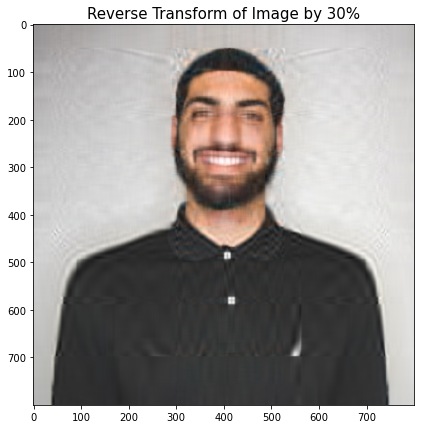

In [80]:
# Reverse transform the reduced image to the original size
rev30 = pca30.inverse_transform(img_trans30)

# Let's see the image
# First we reshape it back into a 3D array
rev30 = np.reshape(rev30, (800, 800, 3))

plt.figure(figsize = (10,7))
plt.title('Reverse Transform of Image by 30%', size=15)
plt.imshow(rev30);

# 50%

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


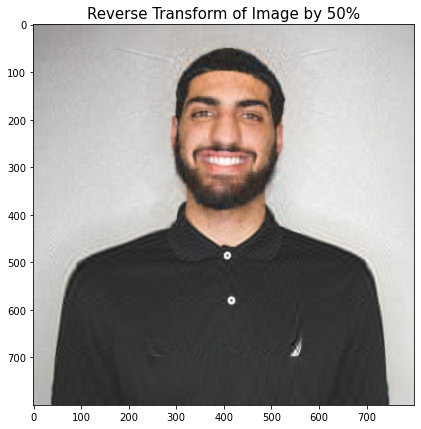

In [81]:
# Reverse transform image to original
rev50 = pca50.inverse_transform(img_trans50)


# Reshape our picture into 3D array
rev50 = np.reshape(rev50, (800, 800, 3))

# Showcase our picture
plt.figure(figsize = (10,7))
plt.title('Reverse Transform of Image by 50%', size=15)
plt.imshow(rev50);

# 75%

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


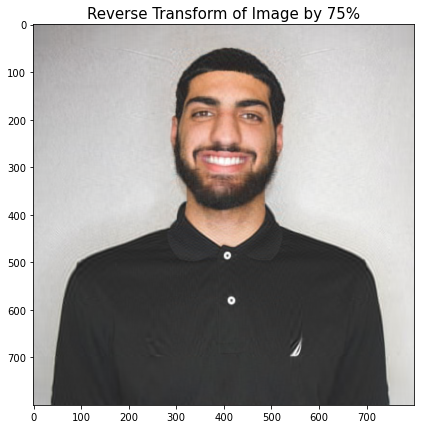

In [82]:
# Reverse transform image to original
rev75 = pca75.inverse_transform(img_trans75)


# Reshape our picture into 3D array
rev75 = np.reshape(rev75, (800, 800, 3))

# Showcase our picture
plt.figure(figsize = (10,7))
plt.title('Reverse Transform of Image by 75%', size=15)
plt.imshow(rev75);

# 90%

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


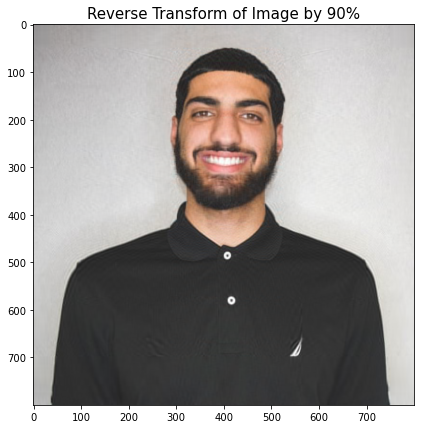

In [83]:
rev90 = pca90.inverse_transform(img_trans90)

# Reshape our picture into 3D array
rev90 = np.reshape(rev90, (800, 800, 3))

# Showcase our picture
plt.figure(figsize = (10,7))
plt.title('Reverse Transform of Image by 90%', size=15)
plt.imshow(rev90);

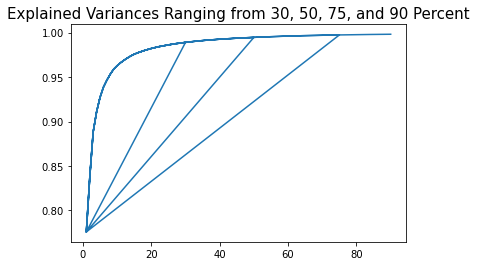

In [102]:
# Explained variance
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.title('Explained Variances Ranging from 30, 50, 75, and 90 Percent', size = 15)


x = []
y = []

def variances():
    for i in range(30):
        pca = PCA(n_components = i+1).fit(img_r)
        j = np.sum(pca.explained_variance_ratio_)
        x.append(i+1)
        y.append(j)

    for i in range(50):
        pca = PCA(n_components = i+1).fit(img_r)
        j = np.sum(pca.explained_variance_ratio_)
        x.append(i+1)
        y.append(j)
    
    for i in range(75):
        pca = PCA(n_components = i+1).fit(img_r)
        j = np.sum(pca.explained_variance_ratio_)
        x.append(i+1)
        y.append(j)

    for i in range(90):
        pca = PCA(n_components = i+1).fit(img_r)
        j = np.sum(pca.explained_variance_ratio_)
        x.append(i+1)
        y.append(j)  
        
    ax.plot(x,y);

variances()